# Handwritten Digits Recognition

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. 
As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

The data set contains images of hand-written digits: 10 classes where each class refers to a digit.

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
import keras.preprocessing.image

### Loading the dataset

In [2]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_test.shape

(10000,)

In [7]:
unique_digits = pd.Series(y_train)

unique_digits.unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=uint8)

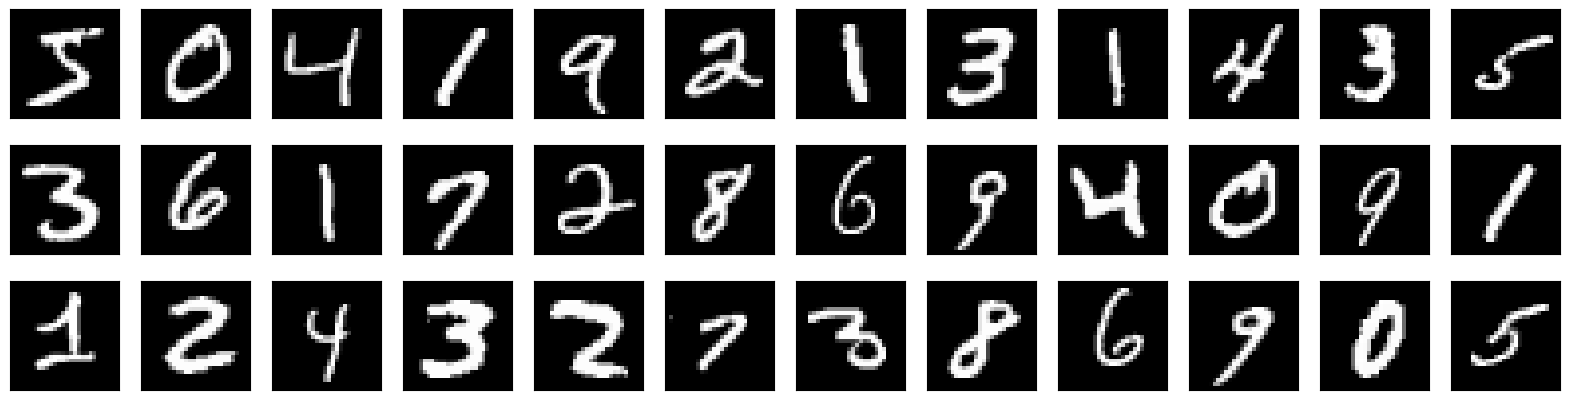

In [8]:
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1 ,xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_train[i]), cmap='gray')

### Data Preprocessing

* Normalizing the pixel values to a range of 0 to 1 can help in speeding up the training process.
* For some models like Convolutional Neural Networks (CNNs), we need to reshape the data to include a channel dimension.

In [9]:
# Normalizing the images
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [10]:
# Reshaping the images to fit the model input
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [11]:
# Convert labels to categorical format
from keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### Model Building

> #### Simple Neural Network

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Build a simple neural network
simple_nn = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
simple_nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
simple_nn.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

C:\Users\hanna\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8713 - loss: 0.4584 - val_accuracy: 0.9603 - val_loss: 0.1342
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9621 - loss: 0.1300 - val_accuracy: 0.9688 - val_loss: 0.1042
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9753 - loss: 0.0831 - val_accuracy: 0.9722 - val_loss: 0.0876
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9815 - loss: 0.0622 - val_accuracy: 0.9745 - val_loss: 0.0850
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9859 - loss: 0.0466 - val_accuracy: 0.9743 - val_loss: 0.0887


> #### CNN

In [13]:
from keras.layers import Conv2D, MaxPooling2D, Dropout

# Build a CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

C:\Users\hanna\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8315 - loss: 0.5177 - val_accuracy: 0.9818 - val_loss: 0.0571
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9668 - loss: 0.1085 - val_accuracy: 0.9903 - val_loss: 0.0383
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9747 - loss: 0.0799 - val_accuracy: 0.9908 - val_loss: 0.0326
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9781 - loss: 0.0712 - val_accuracy: 0.9908 - val_loss: 0.0322
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9810 - loss: 0.0589 - val_accuracy: 0.9918 - val_loss: 0.0284
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9837 - loss: 0.0510 - val_accuracy: 0.9915 - val_loss: 0.0286
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9848 - loss: 0.0485 - val_accuracy: 0.9907 - val_loss: 0.0320
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9869 -

### Model Evaluation

In [14]:
# Evaluate the simple neural network
simple_nn_eval = simple_nn.evaluate(X_test, y_test)
print(f"Simple Neural Network Accuracy: {simple_nn_eval[1]}")

# Evaluate the CNN model
cnn_eval = cnn_model.evaluate(X_test, y_test)
print(f"CNN Accuracy: {cnn_eval[1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9708 - loss: 0.0958
Simple Neural Network Accuracy: 0.9746999740600586
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9915 - loss: 0.0271
CNN Accuracy: 0.9933000206947327


### Building a model for Handwritten digit recognization using Convolutional Neural Network (CNN)

In [15]:
def Handwritten_Digit_Recognization(image,model):
    img = keras.preprocessing.image.load_img(image, color_mode="grayscale", target_size=(28,28))
    img_arr = keras.preprocessing.image.img_to_array(img)
    img_arr = img_arr.astype('float32')/255
    img_arr = tf.expand_dims(img_arr, 0)
    score = cnn_model.predict(img_arr)
    print(score.argmax())

In [16]:
Handwritten_Digit_Recognization('testSet/img_19.jpg',cnn_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
9


In [17]:
Handwritten_Digit_Recognization('testSet/img_20.jpg',cnn_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
0


In [18]:
Handwritten_Digit_Recognization('testSet/img_15.jpg',cnn_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4
